# 1. Implementation of Perceptron classifier

In [51]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
        
    Attributes
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=1 + X.shape[1]) # generate vector of random weights from
        #Gaussian distribution with loc - mean, scale - std, size - number of numbers generated
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
        # In the above for loop we iterate n_inter times, in each iteration we:
#             - iterate through each subsequent sample and we:
#                 - multiply learning rate and difference between target and predicted value for sample xi
#                 - update all weights except the bias unit based on prediction made for sample xi
#                 - update the bias unit
#                 - update errors value if update variable is different than 0.0 (only if prediction was wrong)
#             - then we append the errors attribute
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [45]:
#Some Additional notes
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.dot(v1,v2) #calculate dot product using numpy (or v1.dot(v2)) - much more efficient than method below
sum([i * j for i, j in zip(v1,v2)]) # calcualte dot product using pure python

7.0

## 1. Training perceptron model on Iris dataset

In [46]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


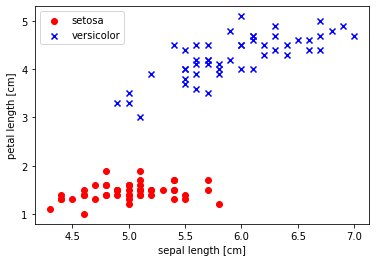

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versilocor
y = df.iloc[0:100, 4].values #extract class of 50 samples of setosa and 50 of versicolor and assign them to variable y
y = np.where(y == 'Iris-setosa', -1, 1) #replace class label with -1 for setosa and 1 for versicolor

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

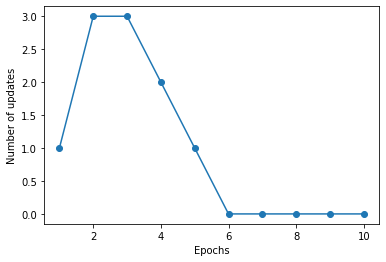

In [52]:
ppn = Perceptron(eta=0.1, n_iter=10) #create Perceptron class object with input data
ppn.fit(X,y) #fit the model to the data, train the model
plt.plot(range(1,len(ppn.errors_) + 1), #here I call the attributes of ppn object
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [54]:
# Let's visualize the decision boundary

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=cl,
        edgecolor='black')

In the above code, first, we define a number of colors and markers and create a colormap from
the list of colors via ListedColormap. Then, we determine the minimum and
maximum values for the two features and use those feature vectors to create a pair
of grid arrays xx1 and xx2 via the NumPy meshgrid function. Since we trained
our perceptron classifier on two feature dimensions, we need to flatten the grid
arrays and create a matrix that has the same number of columns as the Iris training
subset so that we can use the predict method to predict the class labels Z of the
corresponding grid points.

/tmp/ipykernel_5557/2873303708.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


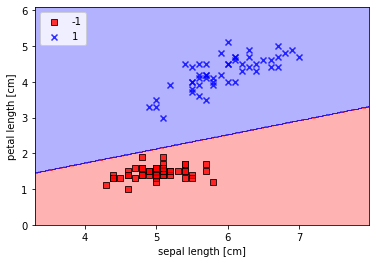

In [55]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# 2. Implementation of ADALINE_GD classifier

In [1]:
import numpy as np

class AdalineGD(object):
    """ADAptive LInear NEuron classifier with gradient descent optimization algorithm.
    
    Parameters
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
        
    Attributes
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=1 + X.shape[1]) # generate vector of random weights from
        #Gaussian distribution with loc - mean, scale - std, size - number of numbers generated
        
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2
            self.cost_.append(cost)
        return self
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In the above code, instead of updating the weights after evaluating each individual training sample,
as in the perceptron, we calculate the gradient based on the whole training dataset
via self.eta * errors.sum() for the bias unit (zero-weight) and via self.eta *
X.T.dot(errors) for the weights 1 to m where X.T.dot(errors) is a matrix-vector
multiplication between our feature matrix and the error vector.

Now, similar to the previous perceptron implementation, we collect the cost values
in a self.cost_ list to check whether the algorithm converged after training.

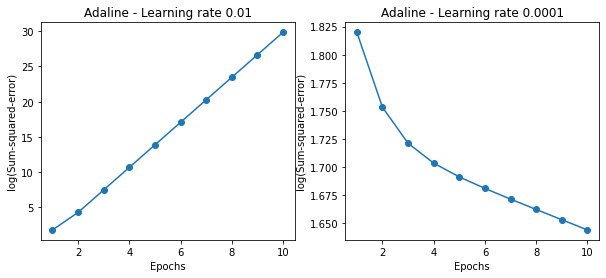

In [81]:
# Plot the cost against the number of epochs for two different learning rates: eta = 0.01 and 0001

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1,len(ada1.cost_) + 1),
          np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1,len(ada2.cost_) + 1),
          np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

The left chart shows what could happen if we choose a learning
rate that is too large. Instead of minimizing the cost function, the error becomes
larger in every epoch, because we overshoot the global minimum. On the other hand,
we can see that the cost decreases on the right plot, but the chosen learning rate
eta = 0.0001 is so small that the algorithm would require a very large number of epochs
to converge to the global cost minimum

## 2. Improving gradient descent through feature scaling

In [83]:
# using NumPy methods
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

/tmp/ipykernel_5557/2873303708.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


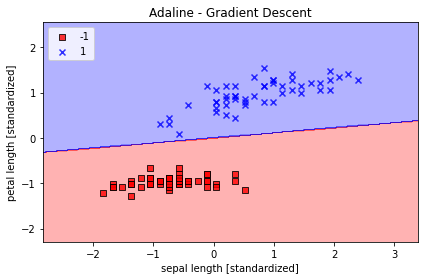

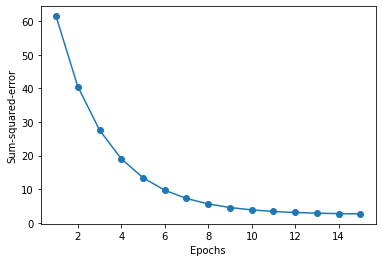

In [93]:
# Let's apply Adaline again and see how it converges using eta = 0.01

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

Note: After standarization of features Adaline has converged much quicker even though eta value was 0.01. The decision region is correctly predicted but it is worth to notice that the SSE remains non-zero.

# 3. Implementation of ADALINE_SGD classifier

In [97]:
import numpy as np

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier with stochastic gradient descent optimization algorithm.
    
    Parameters
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Random number generator seed for random weight initialization.
        
    Attributes
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all training samples in each epoch.
    
    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
            else:
                self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.1, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

The _shuffle method that we are now using in the AdalineSGD classifier works
as follows: via the permutation function in np.random, we generate a random
sequence of unique numbers in the range 0 to 100. Those numbers can then be used
as indices to shuffle our feature matrix and class label vector.

/tmp/ipykernel_5557/2873303708.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


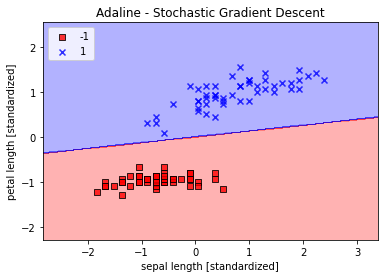

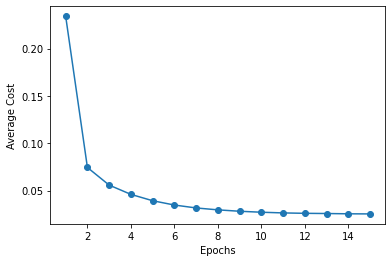

In [98]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

It can be seen that SGD implementation improved the convergence speed compared to batch gradient descent. Also, if we want to learn on fly we can call partial_fit method on individual samples